
## Implementing the use of [pseudo-inverse](#pseudo) matrix
known as Moore-Penrose pseudo-inverse
$$ \Phi^{*} \equiv \left( \Phi^T \Phi \right)^{-1} \Phi^T $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
n_data = 50
x = np.linspace(0,1,n_data)
X = x[0:50:5]
y = np.sin(2*np.pi*x)
y_data = np.random.normal(loc=0, scale=0.3, size=(len(X))) + y[0:50:5]
print(X.shape)
print("\n")
print(X)
print("\n")
print(x.shape)

(10,)


[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735]


(50,)


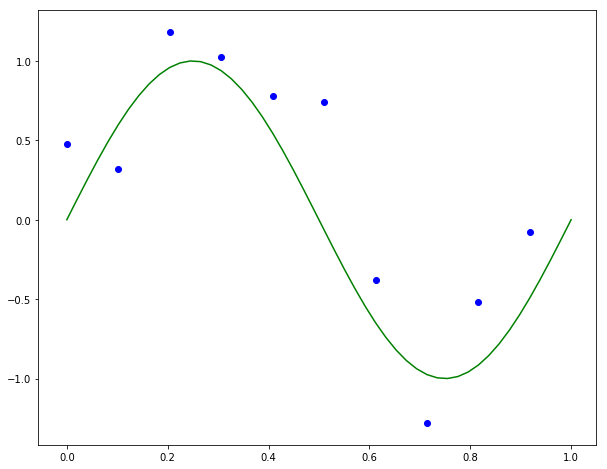

In [83]:
plt.figure(figsize=(10,8))
plt.plot(x,y,c='green')
plt.scatter(X,y_data,c='blue')

In [84]:
#Order
M = 9
M = M+1

In [85]:
xsum = np.zeros((1,M*2))

for i in range(M*2):
    xsum[0][i] = sum(X ** i)

In [86]:
S = np.zeros((M,M))
Y = np.zeros((1,M))

for i in range(M):
    for j in range(M):
        S[i][j] = xsum[0][i+j]
    Y[0][i] = sum(y_data*(X ** i))

<a id='pseudo'>Implementing the pseudo-matrix</a>

In [87]:
# S * W = Y => W = S' * Y
print(S.shape)
print("\n")
print(Y.shape)

S_aux = np.dot(S,S.T) # S * S.T

S_aux = np.linalg.inv(S_aux)

S_inv = np.dot(S_aux,S.T) # S_aux * S.T

W = np.dot(Y,S_inv) # Y * S_inv

# W = np.linalg.solve(S,Y.T)
# W = W.T
print(W.shape)
print("\n")
print(W)


(10, 10)


(1, 10)
(1, 10)


[[ 1.24575290e+00  5.50789791e+01 -6.47353427e+02  2.75053724e+03
  -4.53852162e+03  1.31815611e+03  3.05307940e+03 -6.00179715e+02
  -2.89816528e+03  1.50958657e+03]]


In [88]:
y_pred = 0

for i in range(M):
    y_pred = W[0][i]*(x**i) + y_pred

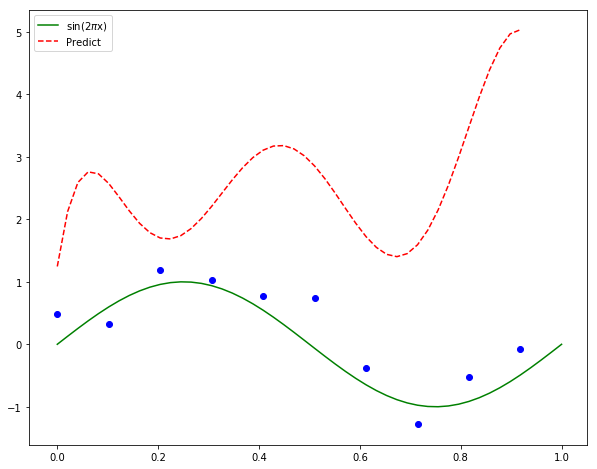

In [89]:
plt.figure(figsize=(10,8))
plt.plot(x,y,c='green',label='sin(2$\pi$x)')
plt.scatter(X,y_data,c='blue')
plt.plot(x[:-4],y_pred[:-4],'r--',label='Predict')
plt.legend()

In [90]:
y_pred = linear_regressor(X,y_data,3)

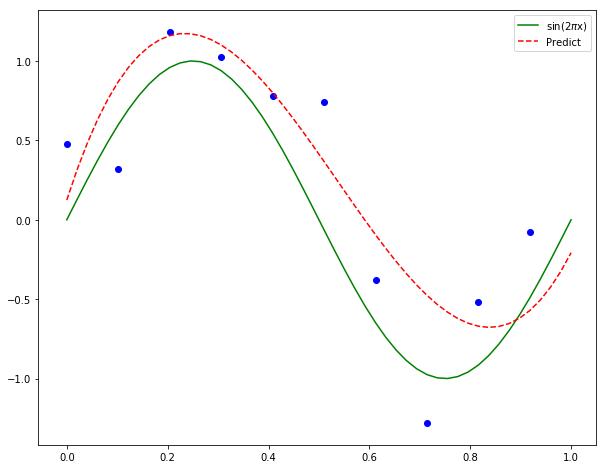

In [91]:
plt.figure(figsize=(10,8))
plt.plot(x,y,c='green',label='sin(2$\pi$x)')
plt.scatter(X,y_data,c='blue')
plt.plot(x,y_pred,'r--',label='Predict')
plt.legend()

## Implement ##

In [92]:
print(X.shape)
print("\n")
print(y_data.shape)

(10,)


(10,)


In [93]:
def linear_regressor(x_data, y_data, M, pseudo=True):
    M = M+1
    
    x_dim = len(x_data);
    y_dim = len(y_data);
    
    if (x_dim != y_dim):
        return print("The X and Y dimensions doesn't match!")
    else:
        
        dim = (x_dim,1)
        
        x_data = np.reshape(x_data, dim)
        y_data = np.reshape(y_data, dim)

        xsum = np.zeros((1,M*2))

        for i in range(M*2):
            xsum[0][i] = sum(x_data ** i)

        S = np.zeros((M,M))
        Y = np.zeros((1,M))

        for i in range(M):
            for j in range(M):
                S[i][j] = xsum[0][i+j]
            Y[0][i] = sum(y_data*(x_data ** i))

        # S * W = Y

        if pseudo == False:
            W = np.linalg.solve(S,Y.T)
        else:
            W = (S.T@S)
            if (np.linalg.det(W) == 0):
                return print("The matrix X'.X is singular!")
            else:
                W = (np.linalg.inv(W)@S.T)@Y.T
                

        y_pred = 0

        x = np.linspace(x_data[0],x_data[len(x_data)-1],50)

        for i in range(M):
            y_pred = W[i][0]*(x**i) + y_pred

        return y_pred

y_pred_test = linear_regressor(X,y_data,3)

(50,)


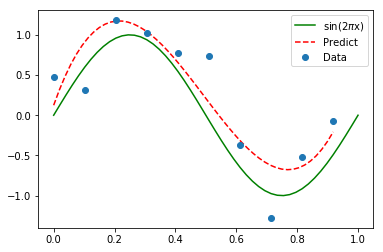

In [94]:
print(y_pred_test.shape)
plt.plot(x,y,c='green',label='sin(2$\pi$x)')
plt.plot(np.linspace(X[0],X[len(X)-1],50),y_pred_test,'r--',label='Predict')
plt.plot(X,y_data,'o',label='Data')
plt.legend()

In [95]:
y_pred_test = y_pred_test[0:50:5]
y_pred_test.shape

(10,)

In [102]:
L = 10

E_rms = np.zeros(L)

M_plt = np.zeros(L)

for i in range(L):
    M_plt[i] = i
    aux = linear_regressor(X,y_data,i)
    aux = aux[0:50:5]
    E_rms[i] = (sum((aux - y_data) ** 2) / len(y_pred_test)) ** 0.5

E_rms_F = np.zeros(L)

M_plt_F = np.zeros(L)

for i in range(L):
    M_plt_F[i] = i
    aux = linear_regressor(X,y_data,i,False)
    aux = aux[0:50:5]
    E_rms_F[i] = (sum((aux - y_data) ** 2) / len(y_pred_test)) ** 0.5

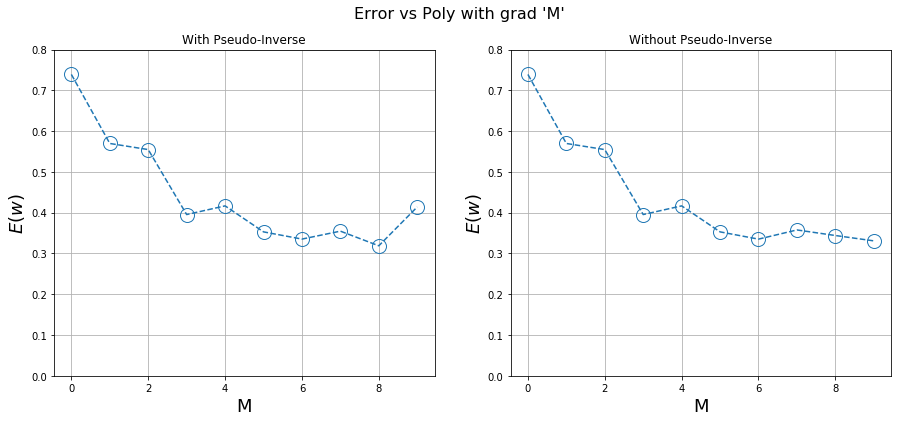

In [103]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('With Pseudo-Inverse')
plt.plot(M_plt,E_rms, 'o--', markerfacecolor="None", ms=14)
plt.xlabel('M', fontsize=18)
plt.ylabel('$E(w)$', fontsize=18)
plt.ylim((0,0.8))
plt.grid()

plt.subplot(1,2,2)
plt.title('Without Pseudo-Inverse')
plt.plot(M_plt_F,E_rms_F, 'o--', markerfacecolor="None", ms=14)
plt.xlabel('M', fontsize=18)
plt.ylabel('$E(w)$', fontsize=18)
plt.ylim((0,0.8))
plt.grid()

#plt.tight_layout()
plt.suptitle("Error vs Poly with grad 'M'", fontsize=16);
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

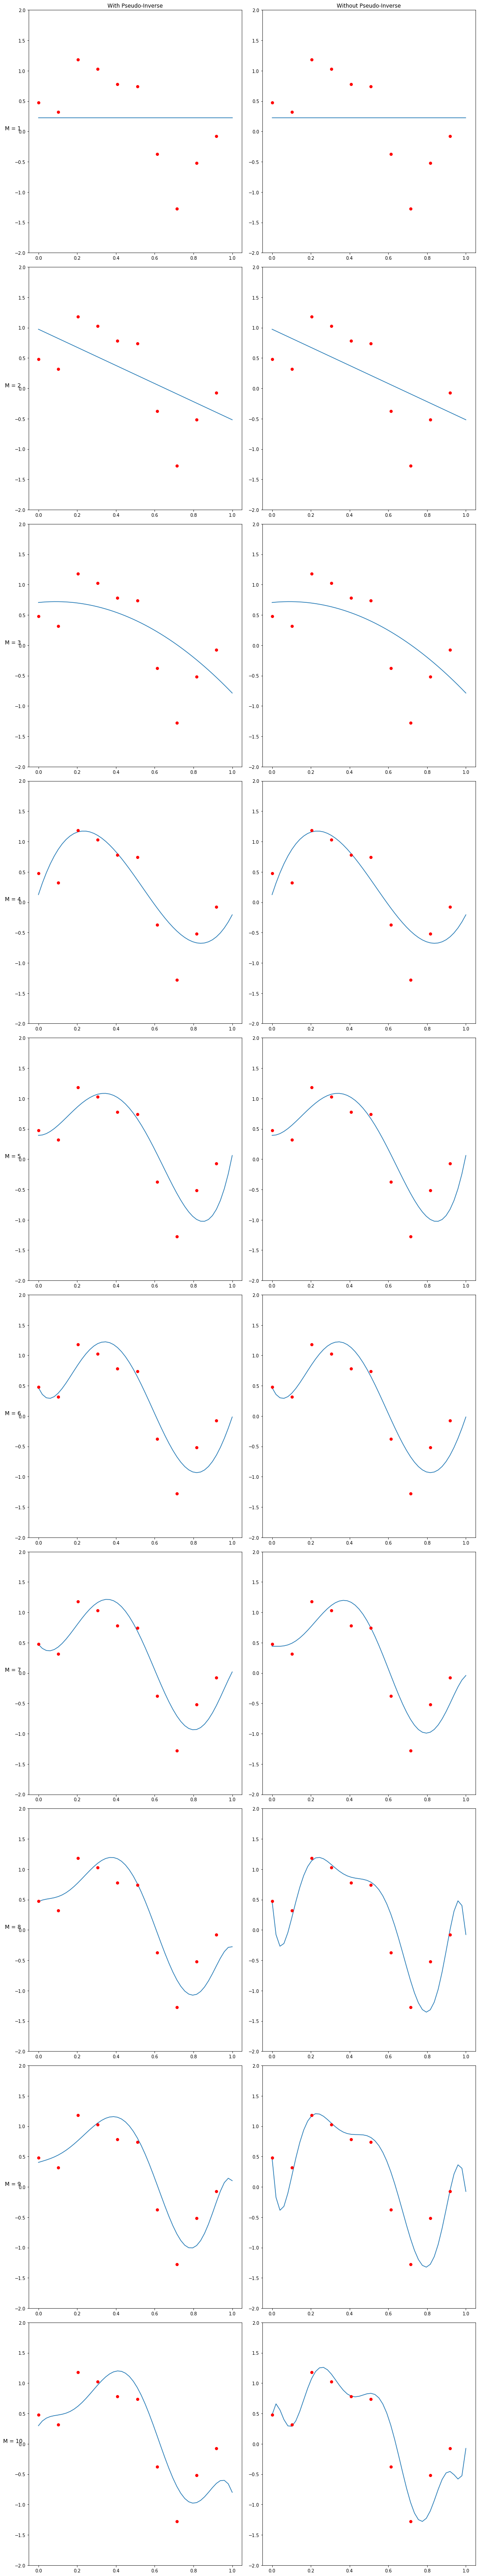

In [105]:
fig,axes = plt.subplots(10,2,figsize=(15,80))
plt.tight_layout()

for i in range(L):
    M_plt[i] = i
    aux = linear_regressor(X,y_data,i)
    #aux = aux[0:50:5]
    axes[i][0].plot(x,aux)
    axes[i][0].plot((np.linspace(min(X),max(X),len(X))),y_data,'or')
    axes[i][0].set_ylim([-2,2])

for i in range(L):
    M_plt_F[i] = i
    aux = linear_regressor(X,y_data,i,False)
    #aux = aux[0:50:5]
    axes[i][1].plot(x,aux)
    axes[i][1].plot(X,y_data,'or')
    axes[i][1].set_ylim([-2,2])
    

cols = ['With Pseudo-Inverse','Without Pseudo-Inverse']
rows = ['M = {}'.format(M+1) for M in range(0, 15)]


for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

fig.tight_layout()
plt.show()

fig.savefig('M_tests.png')